# Capstone Final Project: Predictive Maintenance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read the dataset 
aircraft_train_df = pd.read_csv('train_FD001.txt', sep = ' ', header=None)

# Drop the 26, and 27 cloumns since they are Nan values.
aircraft_train_df = aircraft_train_df.drop([26,27], 1)

# Rename the coulmns with given lables (s1---s21 are sensor given data.) 
aircraft_train_df.columns = ['engine_id','cycle','op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
                                               's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
aircraft_train_df.head()

,engine_id,cycle,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
# Reading test data
aircraft_test_df = pd.read_csv('test_FD001.txt', sep = ' ', header=None)
aircraft_test_df = aircraft_test_df.drop([26,27], 1)
aircraft_test_df.columns = ['engine_id','cycle','op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
                                               's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
aircraft_test_df.head()

,engine_id,cycle,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [7]:
print(aircraft_test_df.columns)

Index(['engine_id', 'cycle', 'op_setting1', 'op_setting2', 'op_setting3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')


### You can see there are 100 turbofan engines that are being tested in this dataset.

In [8]:
np.unique(aircraft_test_df.iloc[:, 0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

### Now I want to be able to know how many cycles it took each engine to go through, before reaching its end.

In [9]:
# reading the truth data. this provides us test set of 100 engines with their actual time to failure. 
aircraft_rul_df = pd.read_csv('RUL_FD001.txt', sep = ' ', header=None)
aircraft_rul_df = aircraft_rul_df.drop([1], 1)
aircraft_rul_df.columns = ['time-to-failure']
aircraft_rul_df.head()

,time-to-failure
0,112
1,98
2,69
3,82
4,91


# Now I will be  describing the datset information

There are three operational settings and 21 sensor measurments.

### Now I will describe the dataset.

In [10]:
# describing the Dataset information 
aircraft_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_id    20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   op_setting1  20631 non-null  float64
 3   op_setting2  20631 non-null  float64
 4   op_setting3  20631 non-null  float64
 5   s1           20631 non-null  float64
 6   s2           20631 non-null  float64
 7   s3           20631 non-null  float64
 8   s4           20631 non-null  float64
 9   s5           20631 non-null  float64
 10  s6           20631 non-null  float64
 11  s7           20631 non-null  float64
 12  s8           20631 non-null  float64
 13  s9           20631 non-null  float64
 14  s10          20631 non-null  float64
 15  s11          20631 non-null  float64
 16  s12          20631 non-null  float64
 17  s13          20631 non-null  float64
 18  s14          20631 non-null  float64
 19  s15 

In [11]:
aircraft_train_df.describe()

,engine_id,cycle,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


As you can see when it decribes the data, it shows that the average amount of cycles in each engine was 108.8 cycles. With the maximum amount of cycles reaching 362.

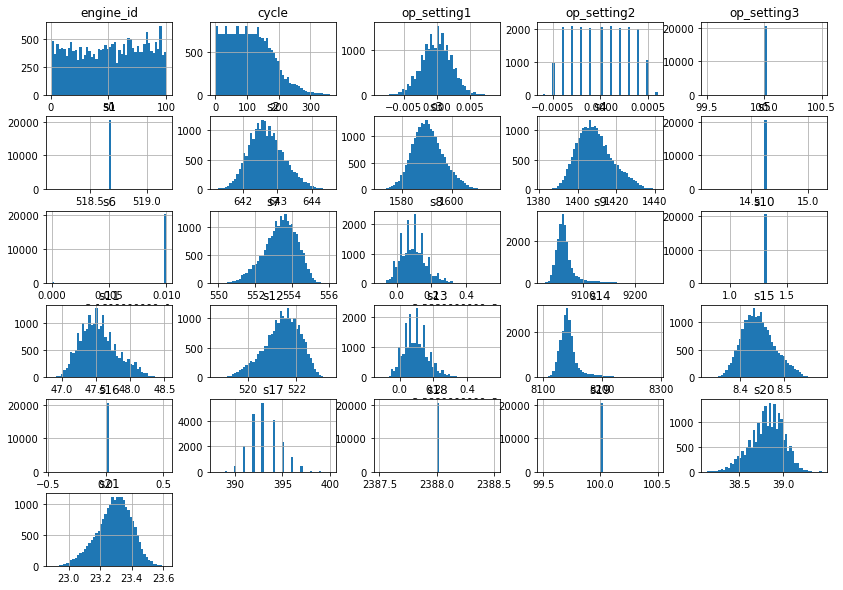

In [12]:
# Histogram of the values of the dataset to see visually.
%matplotlib inline
aircraft_train_df.hist(bins=50, figsize=(14,10))
plt.show()

When looking at this histogram of the data I can use this to point out the constants of the dataset. Some settings and sensors are constant, therefore they can be removed from the test.

The settings and sesnors that are constant and being removed are: (op_setting3, s1, s5, s6, s10, s16, s18, and s19).

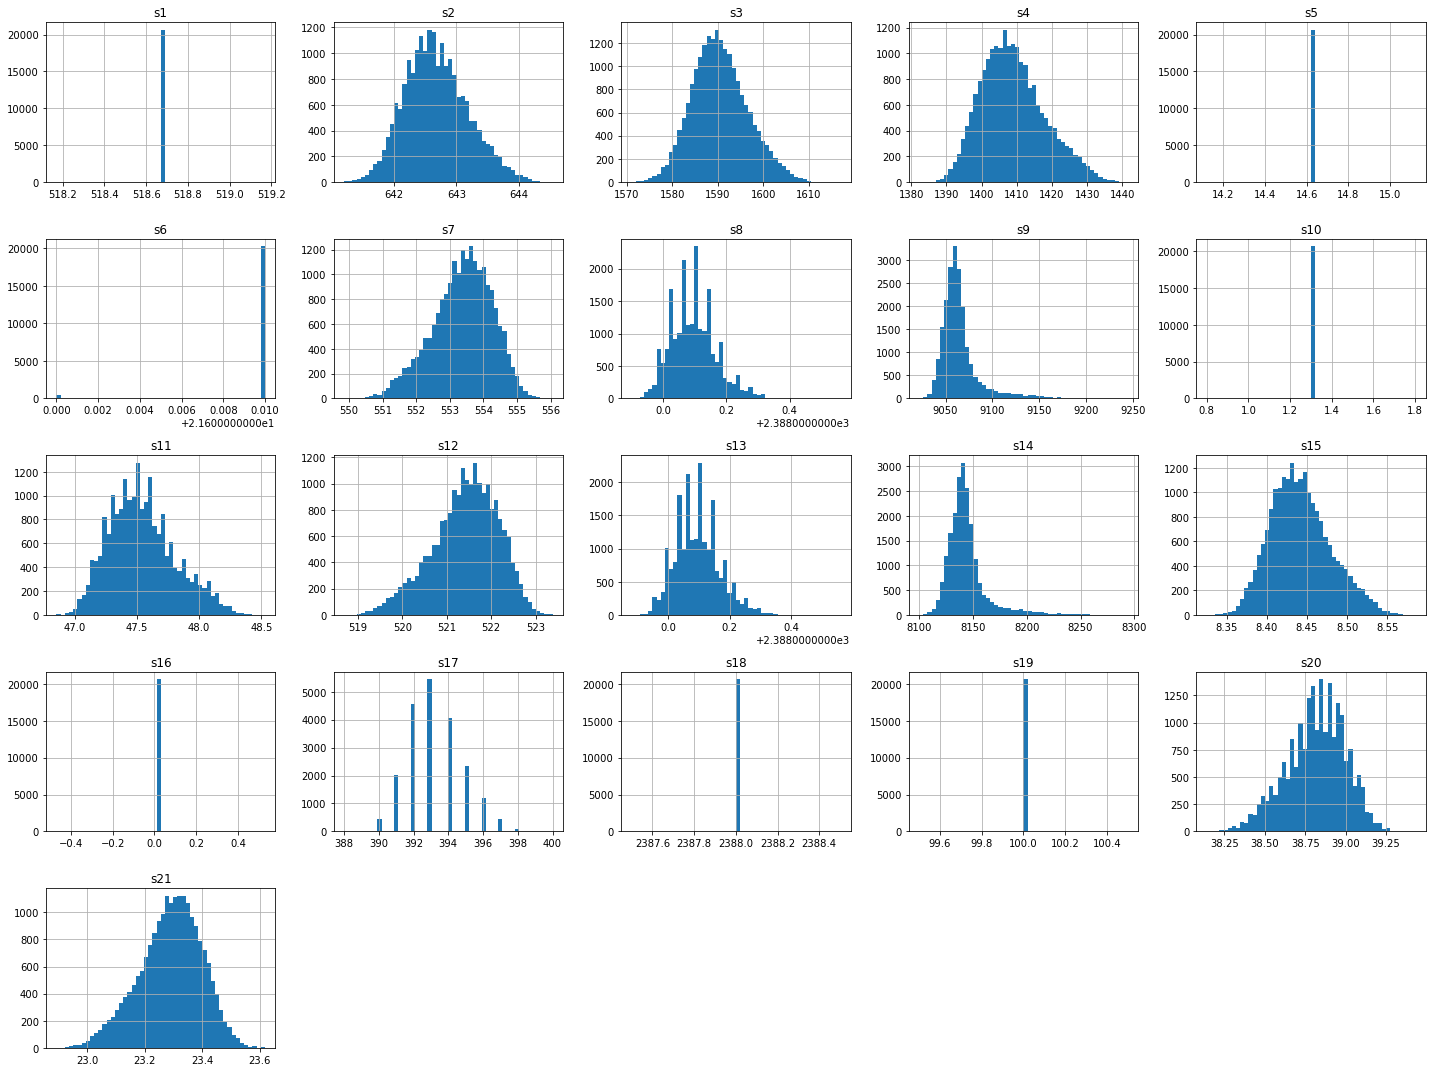

In [13]:
# Plot histograms for sensors only
sensor_columns = ['s' + str(i) for i in range(1, 22)]
aircraft_train_df[sensor_columns].hist(bins=50, figsize=(20, 15))
plt.tight_layout()  # To make the plots less crowded
plt.show()


It can be hard to see in the histogram above, therefore, I took out the op settings and only show the sensors for easier visuals.

This is another way to see that op_setting3, s1, s5, s6, s10, s16, s18, and s19 are constant values. You can also see the coorelation that some of the sesnors have with each other.



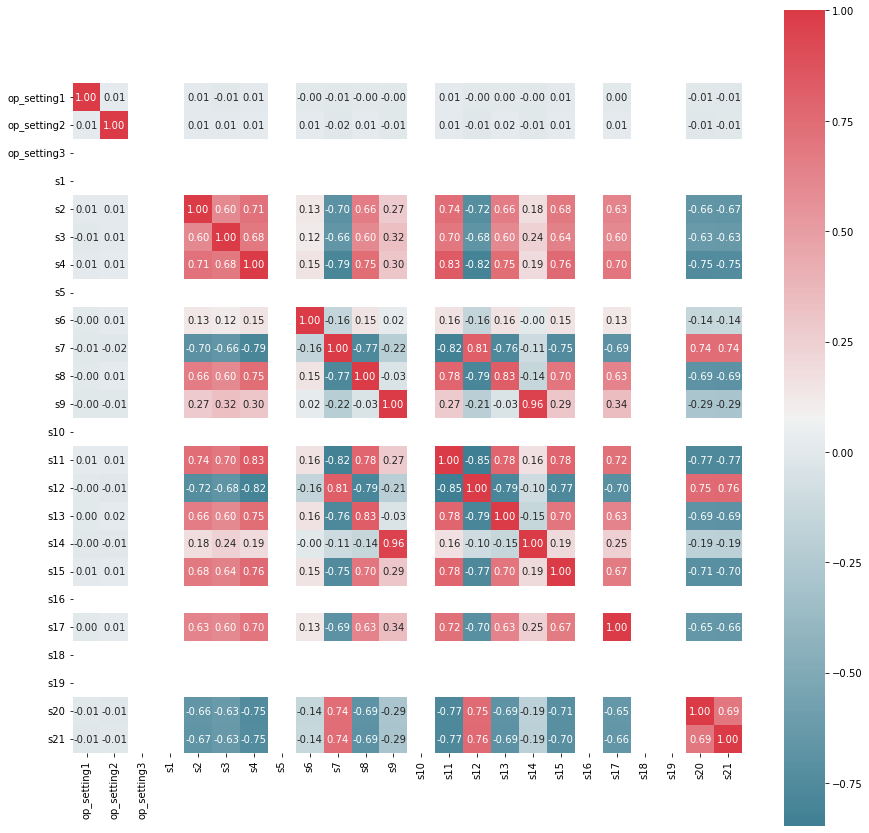

In [14]:
## Correlation of the dataset:
import seaborn as sns
features = aircraft_train_df[['op_setting1','op_setting2','op_setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11',
                                               's12','s13','s14','s15','s16','s17','s18','s19','s20','s21']]
corr_plot_variables=features.corr()

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_plot_variables, annot=True, fmt='.2f',mask=np.zeros_like(corr_plot_variables, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


# Remaining Useful Life (RUL) Extraction

Now I am going to be extracting the RUL of each engine. The RUL is my target that I am trying to get to in the regression task.

The remaining useful life of an engine is calculates by how many cycles are left in the engine from the current cycle of the engine.

For example, if the current cycle is 31 with a RUL of 112, then from cycle 31 there are 112 more cycles until the engine will fail.

In [16]:
# Remaining useful life feature creation for train dataset
data_RUL = pd.DataFrame(aircraft_train_df.groupby('engine_id')['cycle'].max()).reset_index()
data_RUL.columns = ['engine_id', 'max_cycle']
aircraft_train_df = aircraft_train_df.merge(data_RUL, on=['engine_id'], how='left')
aircraft_train_df['RUL'] = aircraft_train_df['max_cycle'] - aircraft_train_df['cycle']
aircraft_train_df = aircraft_train_df.drop('max_cycle', 1)
aircraft_train_df.head()

,engine_id,cycle,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


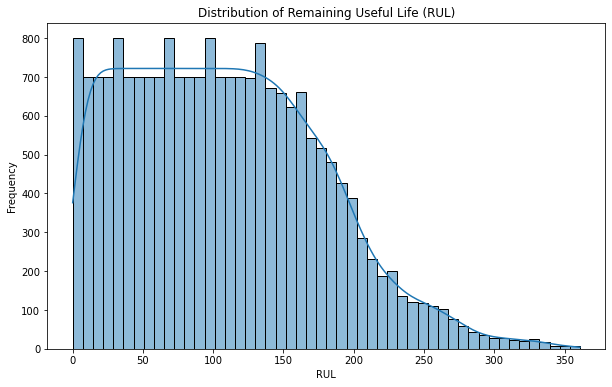

In [17]:
# Histogram of the RUL distribution
plt.figure(figsize=(10, 6))
sns.histplot(aircraft_train_df['RUL'], bins=50, kde=True)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

# RUL Test Dataset 

I have a test dataset that contains data for many engines, and I want to predict how much longer each engine can run before it fails (this is the RUL I'm trying to predict). However, I already know the true RUL values for each engine in the test dataset (i.e., I know how many cycles each engine has left). I'm simply using this information to create a dataset that reflects the true RUL for each engine.

In [19]:
valid_data = pd.DataFrame(aircraft_test_df.groupby('engine_id')['cycle'].max()).reset_index()
valid_data.columns = ['engine_id', 'last_cycle']
df_truth_data = pd.merge(aircraft_test_df, valid_data, on='engine_id')
df_truth_data = df_truth_data[df_truth_data['cycle'] == df_truth_data['last_cycle']]
df_truth_data = df_truth_data.drop(['last_cycle'],1)
df_truth_data.reset_index(drop=True, inplace=True)
df_truth_data = pd.concat([df_truth_data, aircraft_rul_df], axis=1)
df_test_data = df_truth_data.rename(columns={'time-to-failure': 'RUL'})

df_test_data.head()

,engine_id,cycle,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91


# Random Forest

In [20]:
from sklearn.model_selection import train_test_split

# Split into features and target
X = aircraft_train_df.drop(['engine_id', 'RUL'], axis=1)  # Features (dropping engine_id and RUL)
y = aircraft_train_df['RUL']  # Target (RUL)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 25.435408286891203
Root Mean Squared Error (RMSE): 35.97346672398293


# What it means

MAE measures the average absolute difference between the predicted and actual RUL values. It tells you, on average, how much your predictions deviate from the true values.

Interpretation:

- The MAE of 25.44 means that, on average, the model's predictions are off by approximately 25.44 cycles (in the context of RUL) for each engine in the test set.

- The smaller the MAE indicates better model performance, so an MAE of 25.44 suggests that the model's predictions are relatively accurate, but there is still some room for improvement.

RMSE is another metric that measures the average magnitude of the error, but unlike MAE, it gives more weight to larger errors due to squaring the residuals (differences between the predicted and actual values). It is sensitive to outliers because errors are squared before being averaged.

Interpretation:

- The RMSE of 35.97 indicates that, on average, the model's predictions deviate from the true RUL by about 36 cycles.

- The RMSE is generally larger than MAE because it penalizes larger errors more severely due to the squaring of differences. This suggests that while the model is good overall, there may be a few instances where the predictions are significantly off.



In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           scoring='neg_mean_squared_error')  # To minimize RMSE

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate performance of the tuned model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Optimized Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized Root Mean Squared Error (RMSE): {rmse_best}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Mean Absolute Error (MAE): 25.233242326094803
Optimized Root Mean Squared Error (RMSE): 35.550292071482005


Here I am using a parameter grid search to tune the random forest model which helps improve its performance by testing different types of hyperparameters.

In [23]:
# Predict RUL for the test set
X_test_final = df_test_data.drop(['engine_id', 'RUL'], axis=1)  # Features
y_test_true = df_test_data['RUL']  # True RUL values

y_pred_final = best_model.predict(X_test_final)

# Compare predictions with true values (RUL)
final_mae = mean_absolute_error(y_test_true, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test_true, y_pred_final))

print(f"Test set MAE: {final_mae}")
print(f"Test set RMSE: {final_rmse}")

Test set MAE: 18.421719982852572
Test set RMSE: 25.013240976381493


# What does this mean?

Performance Interpretation:

- The MAE of 18.42 and RMSE of 25.01 indicates that the model is performing reasonably well while there is room for improvement, especially for cases where the model might make larger errors.

- RMSE is higher than MAE because the model likely has some larger prediction errors (outliers).



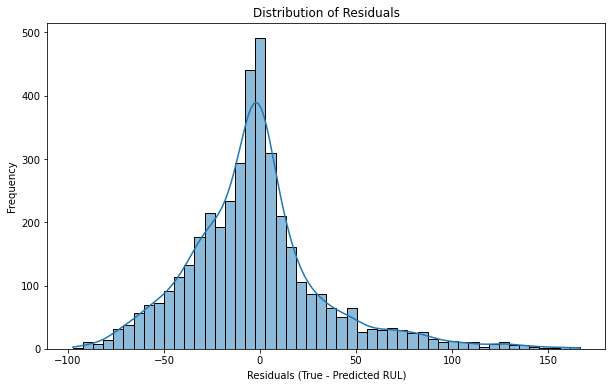

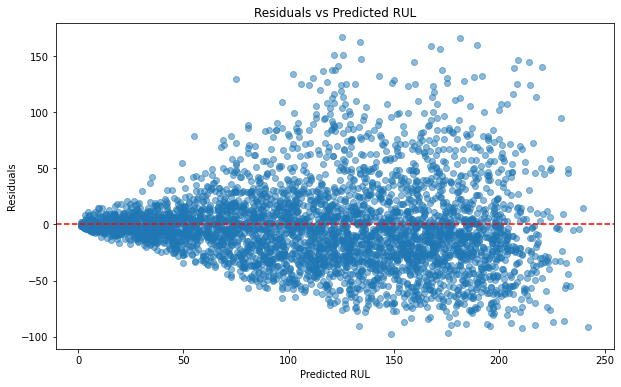

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (True - Predicted RUL)")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted RUL")
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.show()


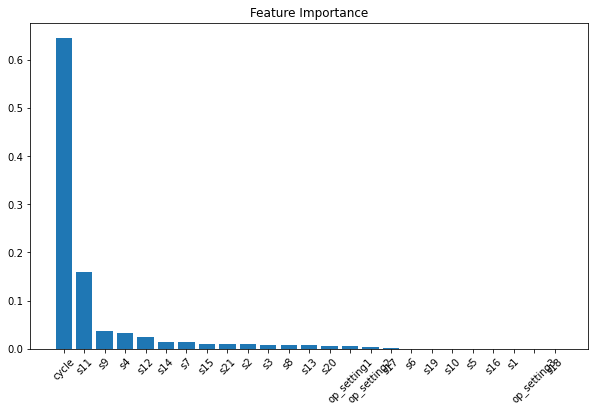

In [40]:
# Feature importance for Random Forest
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(X.columns[sorted_indices], importances[sorted_indices])
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In this chart above it shows the importance of all of the sensors in the model. For example you can see that the sensors s6, s19, s10, s5, s16, and s1 are not being used as conpared to the other sensors.

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression Mean Absolute Error (MAE): {mae_lr}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {rmse_lr}")


Linear Regression Mean Absolute Error (MAE): 30.542623586571242
Linear Regression Root Mean Squared Error (RMSE): 39.70304416687152


In [28]:
# Predict RUL for the test set
y_pred_lr_final = lr_model.predict(X_test_final)

# Compare predictions with true values (RUL)
final_mae_lr = mean_absolute_error(y_test_true, y_pred_lr_final)
final_rmse_lr = np.sqrt(mean_squared_error(y_test_true, y_pred_lr_final))

print(f"Test set MAE (Linear Regression): {final_mae_lr}")
print(f"Test set RMSE (Linear Regression): {final_rmse_lr}")


Test set MAE (Linear Regression): 26.056475929363224
Test set RMSE (Linear Regression): 31.42576799453282


Here are some graphs that show different aspects about the data.

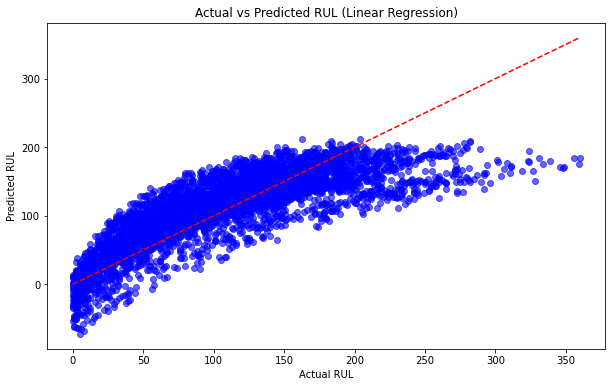

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted RUL (Linear Regression)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.show()

### Residuals plot
This shows the residuals which is the difference between actual and predicted values. It helps check if the errors are evenly distributed which indicates that the model is well-fit.

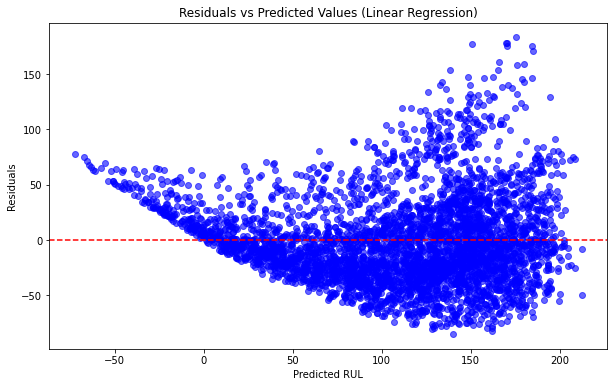

In [30]:
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(10,6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Linear Regression)')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.show()

# Decision Trees

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Decision Tree Mean Absolute Error (MAE): {mae_dt}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_dt}")

Decision Tree Mean Absolute Error (MAE): 35.984976980857766
Decision Tree Root Mean Squared Error (RMSE): 52.08678058214626


In [35]:
# Predict RUL for the test set
y_pred_dt_final = dt_model.predict(X_test_final)

# Compare predictions with true values (RUL)
final_mae_dt = mean_absolute_error(y_test_true, y_pred_dt_final)
final_rmse_dt = np.sqrt(mean_squared_error(y_test_true, y_pred_dt_final))

print(f"Test set MAE (Decision Tree): {final_mae_dt}")
print(f"Test set RMSE (Decision Tree): {final_rmse_dt}")

Test set MAE (Decision Tree): 28.23
Test set RMSE (Decision Tree): 39.323911300886635


In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=param_grid_dt,
                              cv=3,  # 3-fold cross-validation
                              n_jobs=-1,  # Use all available cores
                              scoring='neg_mean_squared_error')  # To minimize RMSE

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search_dt.best_params_}")

# Evaluate the best model
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate performance of the tuned model
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))

print(f"Optimized Mean Absolute Error (MAE) (Decision Tree): {mae_best_dt}")
print(f"Optimized Root Mean Squared Error (RMSE) (Decision Tree): {rmse_best_dt}")


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Mean Absolute Error (MAE) (Decision Tree): 27.661163616501657
Optimized Root Mean Squared Error (RMSE) (Decision Tree): 37.92791473571018


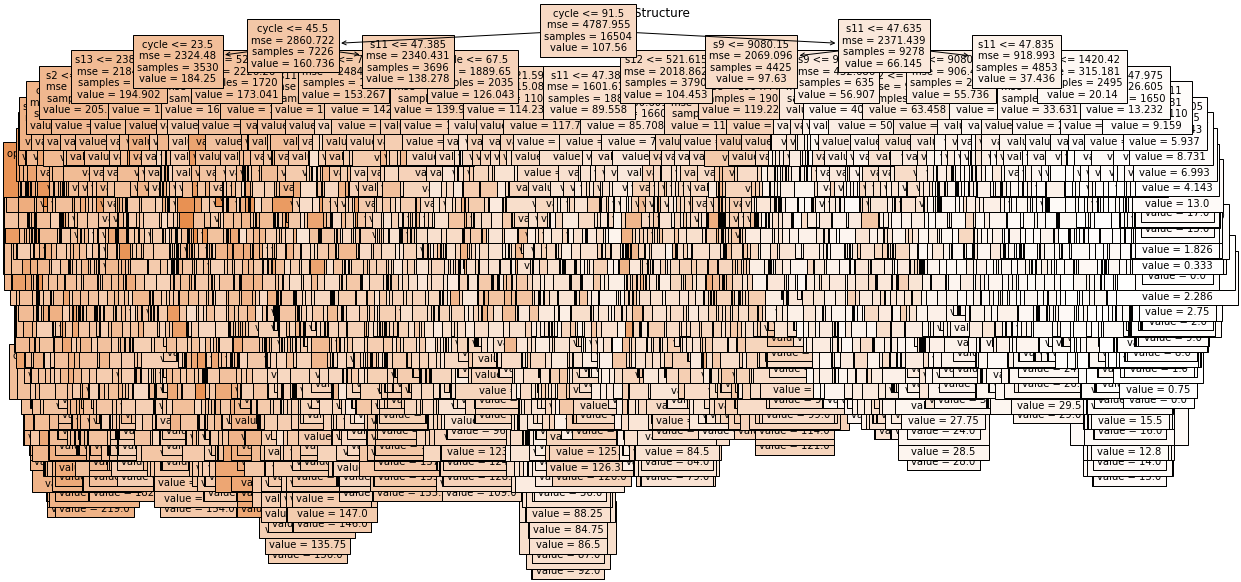

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()

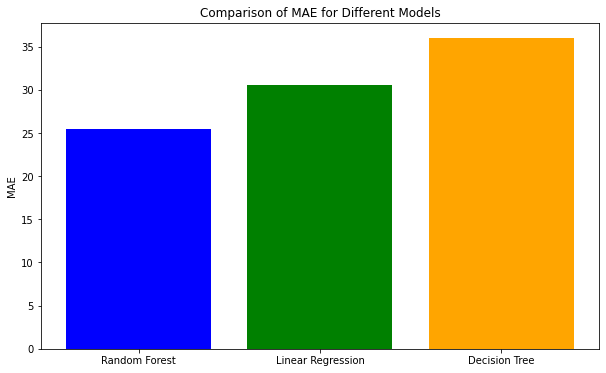

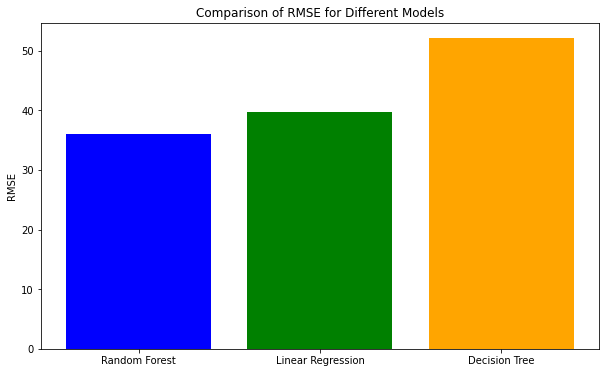

In [38]:
models = ['Random Forest', 'Linear Regression', 'Decision Tree']
mae_values = [mae, mae_lr, mae_dt]
rmse_values = [rmse, rmse_lr, rmse_dt]

# Create bar plot for MAE
plt.figure(figsize=(10,6))
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.title('Comparison of MAE for Different Models')
plt.ylabel('MAE')
plt.show()

# Create bar plot for RMSE
plt.figure(figsize=(10,6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange'])
plt.title('Comparison of RMSE for Different Models')
plt.ylabel('RMSE')
plt.show()